# Functions of Arrays

- [Download the lecture notes](https://philchodrow.github.io/PIC16A/content/np_plt/numpy_4.ipynb). 

`numpy` provides a wide range of functions for performing mathematical operations on arrays. We've already seen a few of these, such a addition, multiplication, exponentiation, and trig functions. In this lecture, we'll go into a bit more detail on entrywise functions. We'll also discuss aggregation functions that allow us to summarize large sets of numbers. 

In [1]:
import numpy as np

In [2]:
A = np.arange(1, 11)
B = np.arange(11, 21)
A, B

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20]))

In [3]:
# Negate an array
- A

array([ -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10])

In [4]:
# absolute value: 
np.abs(-A)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
# entrywise binary arithmetic operators
# all of these also work with a single scalar (e.g. replace B with 2)
A + B

array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

In [6]:
A - B

array([-10, -10, -10, -10, -10, -10, -10, -10, -10, -10])

In [7]:
A * B

array([ 11,  24,  39,  56,  75,  96, 119, 144, 171, 200])

In [8]:
A / B

array([0.09090909, 0.16666667, 0.23076923, 0.28571429, 0.33333333,
       0.375     , 0.41176471, 0.44444444, 0.47368421, 0.5       ])

In [9]:
B ** A

array([            11,            144,           2197,          38416,
               759375,       16777216,      410338673,    11019960576,
         322687697779, 10240000000000])

In [10]:
B % A

array([0, 0, 1, 2, 0, 4, 3, 2, 1, 0])

## Mathematical Functions

#### Trig Functions

In [11]:
theta = np.linspace(0, np.pi, 3)

In [12]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))
# ---

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


#### Exponentials and Logarithms

In [13]:
x = np.array([1, 2, 3])

In [14]:
# exponentiate a scalar
2**x

array([2, 4, 8])

In [15]:
# exponential function e^x
np.exp(x)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [16]:
# natural logarithm hashtag best logarithm
np.log(x)

array([0.        , 0.69314718, 1.09861229])

In [17]:
# base 10 and base 2 logarithms
# 

np.log2(x)
np.log10(x)

array([0.        , 0.30103   , 0.47712125])

#### NaN

When `numpy` performs an illegal mathematical operation, it will generate the value `np.nan` (for Not A Number). A common example is computing the logarithm of negative numbers. **Warnings** are generated in this case. 

In [18]:
x = np.array([-1, -2])
x, np.log(x)

<ipython-input-18-453beab6e6bc>:2: RuntimeWarning: invalid value encountered in log
  x, np.log(x)


(array([-1, -2]), array([nan, nan]))

NaN values propagate: any operation involving an NaN will generate more NaNs in the corresponding entries: 

In [19]:
y = np.log(x)
y, y + 2

<ipython-input-19-bc1dd3480584>:1: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


(array([nan, nan]), array([nan, nan]))

A similar case occurs when we try to divide by zero. In this case, we get `np.inf` (for infinity): 

In [20]:
z = np.array([1, 1]) / np.array([0, 0])
z

<ipython-input-20-983fea7b6f00>:1: RuntimeWarning: divide by zero encountered in true_divide
  z = np.array([1, 1]) / np.array([0, 0])


array([inf, inf])

`np.inf` values also propagate, e.g. `1 + np.inf = np.inf`. However, we can divide by `np.inf` values: 

In [21]:
1/z

array([0., 0.])

## Plotting Functions

We haven't yet formally introduced data visualization tools in Python. As a quick preview, let's see how to use vectorized `numpy` to easily plot mathematical functions. 

In [22]:
from matplotlib import pyplot as plt

#### Parabola

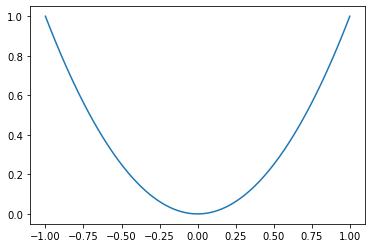

In [23]:
x = np.linspace(-1, 1, 101)
plt.plot(x, x**2)

#### Exponential and Logarithm

<ipython-input-24-0d0ca18cf58c>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x), label = r"$y = \log(x)$")
<ipython-input-24-0d0ca18cf58c>:2: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x), label = r"$y = \log(x)$")


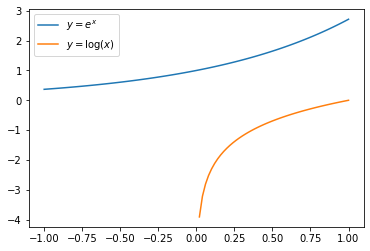

In [24]:
plt.plot(x, np.exp(x), label = r"$y = e^x$")
plt.plot(x, np.log(x), label = r"$y = \log(x)$")
plt.legend()
# warning comes from trying to compute np.log(-1)

#### 2-d Plotting

It's easy to compute functions over multi-dimensional arrays. An especially common case is when we want to compute a function over one or more 2d arrays and then plot the result. Here's a simple example. We'll go into more detail on how to obtain finer control when we go more deeply into plotting in a future lecture. 

In [25]:
# two 100x100 arrays
x = np.reshape(np.linspace(0, 2*np.pi, 10000), (100, 100))
y = np.reshape(np.linspace(0, 2*np.pi, 10000), (100, 100)).T

# function of these arrays, also 100x100
z = np.sin(x) + np.cos(y)
z

array([[1.        , 0.99865472, 0.99336989, ..., 1.04331654, 1.05373415,
        1.06023523],
       [1.06279659, 1.0614106 , 1.05608519, ..., 1.10599366, 1.11636862,
        1.12282672],
       [1.12534491, 1.12391573, 1.11854727, ..., 1.168183  , 1.17851284,
        1.18492549],
       ...,
       [0.8113604 , 0.80618247, 0.79708749, ..., 0.86536236, 0.87197752,
        0.87465351],
       [0.87338221, 0.86817112, 0.85904326, ..., 0.92798314, 0.93456276,
        0.93720301],
       [0.93589596, 0.93064924, 0.92148603, ..., 0.99085636, 0.99739795,
        1.        ]])

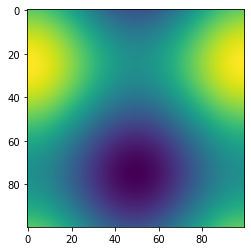

In [26]:
plt.imshow(z)